In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, MaxPooling2D ,Conv2D, Flatten, GlobalMaxPool2D
from tensorflow.keras.applications import Xception, mobilenet_v3, vgg16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
baseDir = '/kaggle/input/eyepacs-airogs-light/release-crop/release-crop/'
testDir = baseDir + 'test'
trainDir = baseDir + 'train'
validDir = baseDir + 'validation'

train_NRG = os.path.join(trainDir, 'NRG')
train_RG = os.path.join(trainDir, 'RG')

valid_NRG = os.path.join(validDir, 'NRG')
valid_RG = os.path.join(validDir, 'RG')

In [3]:
img_width, img_height = 224,224
batch_size = 32
num_epochs = 50

In [4]:
val_datagen = ImageDataGenerator(rescale = 1. / 255)
train_datagen = ImageDataGenerator(#rotation_range=90,
                                    #brightness_range=[0.1, 0.7],
                                     width_shift_range=0.5,
                                     height_shift_range=0.5,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     #validation_split=0.15,
                                    #preprocessing_function=preprocess_input,
                                    zoom_range=0.15,
                                    fill_mode="constant",
                                    cval=0.1,
                                    rescale = 1. / 255)
                                    
                                    



test_datagen = ImageDataGenerator(rescale = 1. / 255)
                                    


In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=trainDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = True
)

validation_generator = val_datagen.flow_from_directory(
    directory=validDir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle = False
)

test_generator =  test_datagen.flow_from_directory(
    testDir,
    batch_size=batch_size,
    class_mode='binary',
    target_size=(img_width, img_height),
    shuffle = False
)

Found 5000 images belonging to 2 classes.
Found 540 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.25,
                              patience=3,
                              verbose=1,
                              mode='auto',
                              min_lr=0)

early_stopping = EarlyStopping(monitor='val_loss', # val_loss değerindeki değişimleri kontrol et
                               patience = 15, # en az belirtilen epoch boyunca iyileşme olmazsa durdur
                               mode='auto',
                               min_delta = 0.001)


base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False,
                                                        input_shape=(img_width, img_height, 3), 
                                                        classifier_activation='sigmoid')
base_model.trainable = True
#for layer in base_model.layers[:108]:
 #   layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
          loss='binary_crossentropy',
          metrics = ['accuracy'])
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[lr_reduce, early_stopping],
    verbose = 2
)


83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/50
157/157 - 132s - loss: 0.5876 - accuracy: 0.6962 - val_loss: 1.6397 - val_accuracy: 0.7981 - lr: 0.0010 - 132s/epoch - 841ms/step
Epoch 2/50
157/157 - 66s - loss: 0.4588 - accuracy: 0.7940 - val_loss: 0.4569 - val_accuracy: 0.8204 - lr: 0.0010 - 66s/epoch - 422ms/step
Epoch 3/50
157/157 - 65s - loss: 0.4124 - accuracy: 0.8180 - val_loss: 1.0414 - val_accuracy: 0.7333 - lr: 0.0010 - 65s/epoch - 416ms/step
Epoch 4/50
157/157 - 65s - loss: 0.3833 - accuracy: 0.8230 - val_loss: 0.4269 - val_accuracy: 0.8019 - lr: 0.0010 - 65s/epoch - 412ms/step
Epoch 5/50
157/157 - 66s - loss: 0.3639 - accuracy: 0.8394 - val_loss: 0.4044 - val_accuracy: 0.8852 - lr: 0.0010 - 66s/epoch - 418ms/step
Epoch 6/50
157/157 - 67s - loss: 0.3463 - accuracy: 0.8486 - val_loss: 0.5204 - val_accuracy: 0.8185 - lr: 0.0010 - 67s/epoch - 428ms/step
Epoch 7/50
157/157 - 65s - loss: 0.3364 - accuracy: 0.8474 - val_loss: 0.2455 - val_accuracy: 0.898

32/32 - 8s - loss: 0.1833 - accuracy: 0.9250 - 8s/epoch - 252ms/step


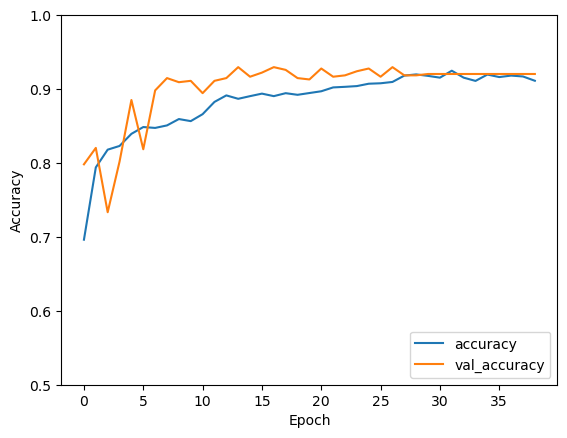

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2)

In [8]:
base_model1 = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False,
                                                        input_shape=(img_width, img_height, 3), 
                                                        classifier_activation='sigmoid')
base_model1.trainable = True
#for layer in base_model.layers[:108]:
 #   layer.trainable = False

y = base_model1.output
y = GlobalAveragePooling2D()(y)
y = Dropout(0.5)(y)
predictions1 = Dense(1, activation='sigmoid')(y)
model1 = Model(inputs=base_model1.input, outputs=predictions1)

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
          loss='binary_crossentropy',
          metrics = ['accuracy'])
history = model1.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[lr_reduce, early_stopping],
    verbose = 2
)


87910968/87910968 [==============================] - 0s 0us/step
Epoch 1/50
157/157 - 107s - loss: 0.6570 - accuracy: 0.6234 - val_loss: 0.5311 - val_accuracy: 0.7352 - lr: 0.0010 - 107s/epoch - 682ms/step
Epoch 2/50
157/157 - 59s - loss: 0.5276 - accuracy: 0.7400 - val_loss: 0.4322 - val_accuracy: 0.8185 - lr: 0.0010 - 59s/epoch - 374ms/step
Epoch 3/50
157/157 - 58s - loss: 0.4990 - accuracy: 0.7448 - val_loss: 0.6869 - val_accuracy: 0.7870 - lr: 0.0010 - 58s/epoch - 371ms/step
Epoch 4/50
157/157 - 58s - loss: 0.4527 - accuracy: 0.7820 - val_loss: 0.3175 - val_accuracy: 0.8630 - lr: 0.0010 - 58s/epoch - 371ms/step
Epoch 5/50
157/157 - 59s - loss: 0.4428 - accuracy: 0.7800 - val_loss: 0.4101 - val_accuracy: 0.8241 - lr: 0.0010 - 59s/epoch - 375ms/step
Epoch 6/50
157/157 - 59s - loss: 0.4447 - accuracy: 0.7822 - val_loss: 0.5147 - val_accuracy: 0.8185 - lr: 0.0010 - 59s/epoch - 373ms/step
Epoch 7/50
157/157 - 58s - loss: 0.4329 - accuracy: 0.7966 - val_loss: 0.2917 - val_accuracy: 0.868

In [9]:
base_model2 = tf.keras.applications.densenet.DenseNet169(weights='imagenet', include_top=False,
                                                        input_shape=(img_width, img_height, 3), 
                                                        classifier_activation='sigmoid')
base_model2.trainable = True
#for layer in base_model.layers[:108]:
 #   layer.trainable = False

z = base_model2.output
z = GlobalAveragePooling2D()(z)
z = Dropout(0.5)(z)
predictions2 = Dense(1, activation='sigmoid')(z)
model2 = Model(inputs=base_model2.input, outputs=predictions2)

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
          loss='binary_crossentropy',
          metrics = ['accuracy'])
history = model2.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[lr_reduce, early_stopping],
    verbose = 2
)


51877672/51877672 [==============================] - 0s 0us/step
Epoch 1/50
157/157 - 184s - loss: 0.7064 - accuracy: 0.6002 - val_loss: 0.6804 - val_accuracy: 0.5500 - lr: 0.0010 - 184s/epoch - 1s/step
Epoch 2/50
157/157 - 65s - loss: 0.5813 - accuracy: 0.6978 - val_loss: 1.4132 - val_accuracy: 0.6796 - lr: 0.0010 - 65s/epoch - 412ms/step
Epoch 3/50
157/157 - 64s - loss: 0.5345 - accuracy: 0.7240 - val_loss: 4.8999 - val_accuracy: 0.6148 - lr: 0.0010 - 64s/epoch - 409ms/step
Epoch 4/50
157/157 - 64s - loss: 0.4743 - accuracy: 0.7672 - val_loss: 0.5681 - val_accuracy: 0.8315 - lr: 0.0010 - 64s/epoch - 409ms/step
Epoch 5/50
157/157 - 65s - loss: 0.4657 - accuracy: 0.7758 - val_loss: 0.5575 - val_accuracy: 0.7204 - lr: 0.0010 - 65s/epoch - 414ms/step
Epoch 6/50
157/157 - 67s - loss: 0.4595 - accuracy: 0.7804 - val_loss: 0.3523 - val_accuracy: 0.8704 - lr: 0.0010 - 67s/epoch - 424ms/step
Epoch 7/50
157/157 - 66s - loss: 0.4333 - accuracy: 0.7824 - val_loss: 0.5979 - val_accuracy: 0.7611 -

In [28]:
# average ensemble model 

# import Average layer
from tensorflow.keras.layers import Average 

inputX = Input(shape=(224, 224, 3), name='input')  # input layer

# get output for each input model
outputs = [model(inputX) for model in models] 

# take average of the outputs
x = Average()(outputs) 

x = Dense(64, activation='relu')(x) 
x = Dropout(0.3)(x) 
output = Dense(1, activation='sigmoid', name='output')(x) # output layer

# create average ensembled model
avg_model = Model(inputX, output)


In [29]:
conc_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss='binary_crossentropy',
          metrics = ['accuracy'])

In [30]:
history = conc_model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    callbacks=[lr_reduce, early_stopping],
    verbose = 2
)


Epoch 1/50
157/157 - 299s - loss: 0.5042 - accuracy: 0.7242 - val_loss: 0.3771 - val_accuracy: 0.8833 - lr: 0.0010 - 299s/epoch - 2s/step
Epoch 2/50
157/157 - 103s - loss: 0.5197 - accuracy: 0.7142 - val_loss: 0.3875 - val_accuracy: 0.8444 - lr: 0.0010 - 103s/epoch - 655ms/step
Epoch 3/50
157/157 - 102s - loss: 0.5236 - accuracy: 0.7060 - val_loss: 0.4292 - val_accuracy: 0.8426 - lr: 0.0010 - 102s/epoch - 647ms/step
Epoch 4/50

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
157/157 - 102s - loss: 0.5420 - accuracy: 0.6886 - val_loss: 0.4609 - val_accuracy: 0.8241 - lr: 0.0010 - 102s/epoch - 647ms/step
Epoch 5/50
157/157 - 103s - loss: 0.5142 - accuracy: 0.7242 - val_loss: 0.3363 - val_accuracy: 0.9037 - lr: 2.5000e-04 - 103s/epoch - 655ms/step
Epoch 6/50
157/157 - 103s - loss: 0.4901 - accuracy: 0.7364 - val_loss: 0.3137 - val_accuracy: 0.9111 - lr: 2.5000e-04 - 103s/epoch - 654ms/step
Epoch 7/50
157/157 - 103s - loss: 0.4976 - accuracy: 0.7352 - val_loss: 

In [31]:
test_loss, test_acc = conc_model.evaluate(test_generator, verbose=2)

32/32 - 7s - loss: 0.2979 - accuracy: 0.9050 - 7s/epoch - 226ms/step


In [ ]:
print(test_acc)